# <font color="Blue">Using an Intelligent Agent to Assist with Application Portfolio Management</font>

<br>
Intelligent Agents - Course 3547
<br>
University of Toronto School of Continuing Studies
<br><br>
Cameron Turner
<br>
December 2, 2025

## <font color="Blue">Introduction</font>

Application Portfolio Management (APM) is the work undertaken by an organization to manage the evolution of its software application inventory.  
<br>
An organization’s inventory typically includes applications in the following domains:
<ul>
    <li>Custom Developed business applications (e.g., .Net, Java, Python, web, client-server)</li>
    <li>Commercial Off-the-Shelf (COTS) applications</li>
    <li>3rd party managed Software-as-a-Service (SaaS) and cloud applications</li>
</ul>
APM can benefit organizations in the areas of investment planning, strategic direction, streamlining costs, understanding operations and developing enterprise architecture.

Managing the portfolio can be a daunting process and assessing and classifying applications into buckets is not an exact science.   
<br>
However...
<br>
<ul>
<li>Heuristics and rules can be identified to classify / triage applications based on APM performance measurements (e.g., business value, technical condition, Return on Investment).</li>
<li>An Agent can use rules to build a knowledge graph to represent different application domain assessments.</li>
<li>An Agent can also use rules to traverse the knowledge graph using shortest-path, breadth-first and depth-first searches to identify applications for particular plans.</li>  
</ul>
<br>
Finally, identifying rules and heuristics can facilitate knowledge transfer to new staff.

## <font color="Blue">Agent Design</font>

The class diagram for the Planning Agent is outlined below.

In [7]:
![title](img/picture.png)

'[title]' is not recognized as an internal or external command,
operable program or batch file.


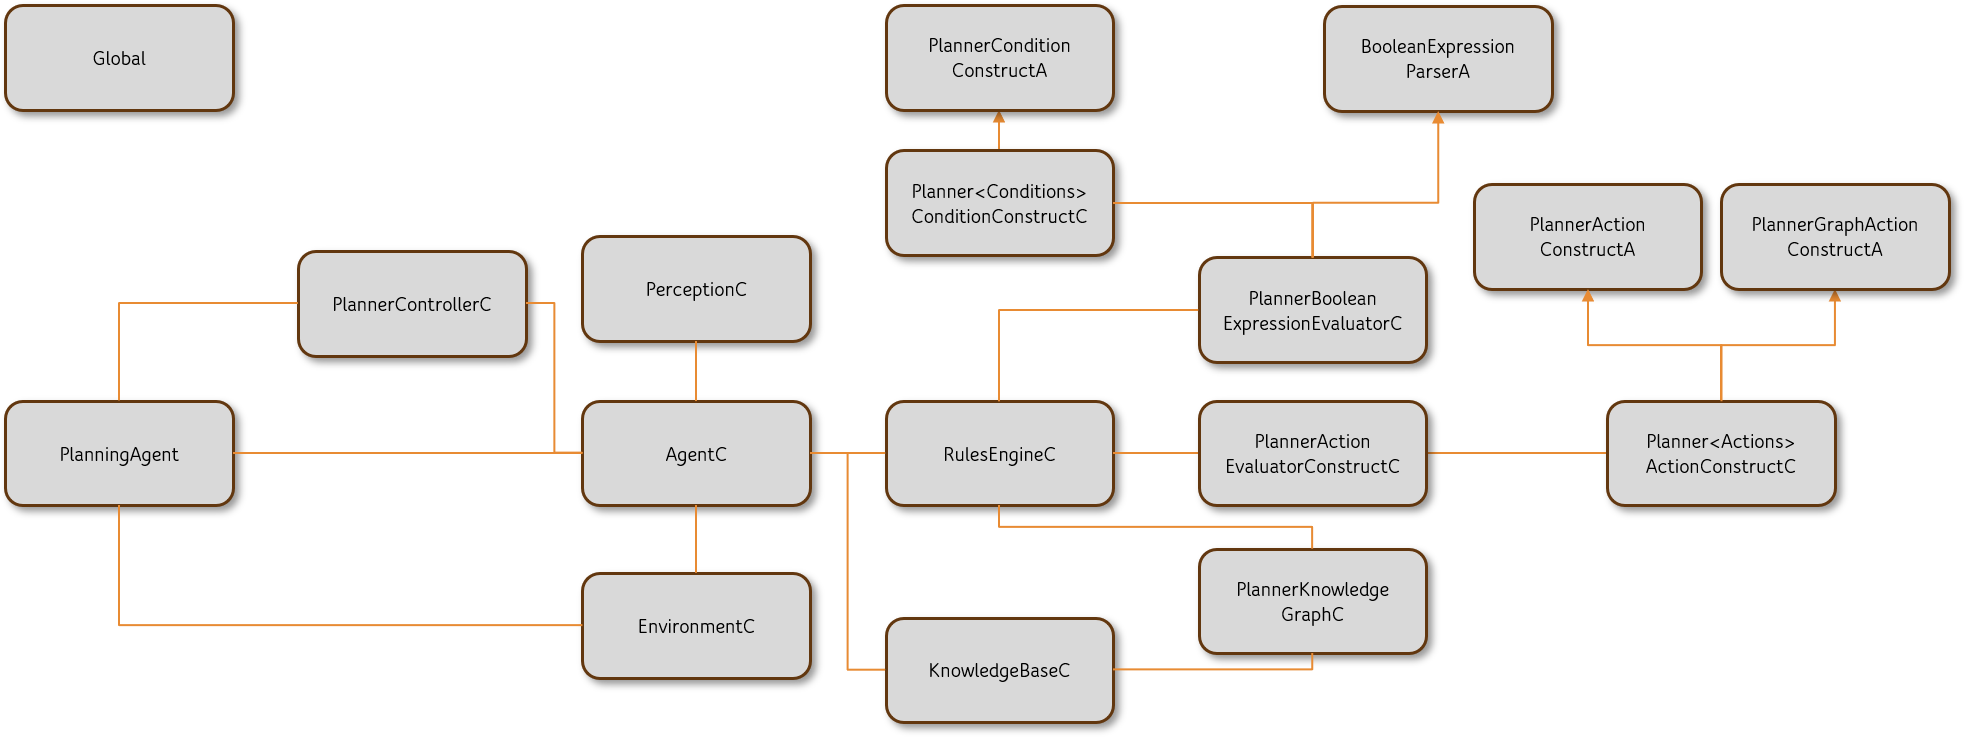

## <font color="Blue">Code</font>

### <font color="Green">Class: Global</font>

Class to contain global variables for the planner.

In [11]:
# Global.py

# Global variables.

# Information display variables.

class Global:
    
    # Information display variables.
    
    _debug = False
    _info  = False
    
    # Environment variables.
    
    _manual_drive = True
    
    
    # Plan variables.
    
    _quit     = "quit"
    _rebuild  = "rebuild"
    _rehost   = "rehost"
    _replace  = "replace"
    _refactor = "refactor"
    _retire   = "retire"
    _sustain  = "sustain"
    _tolerate = "tolerate"
    
    _plan_list = [ _rebuild, _rehost, _replace, _refactor, _retire, _sustain, _tolerate, _quit ]
    
    # Boolean Expression Parser variables.
    
    _left_square_bracket = "["
    _right_square_bracket = "]"
    _condition_EOL = ";"
    _and = "AND"
    _or = "OR"
    
    # Pointers to data that can be used outside the Agent.
        
    _planner_knowledge_graph = None
    _data_list = []
    _rules = []


### <font color="Green">Class: PlannerKnowledgeGraphC</font>

Class to contain the state-space Knowledge Graph representation.

In [13]:
# PlannerKnowledgeGraphC

# Import libraries.

import networkx as nx

class PlannerKnowledgeGraphC:

    # Constructor

    def __init__(self):

        try:

            # Create the Directed Graph.

            self.G = nx.DiGraph()

            # Add the Start node to the graph.
        
            self.add_node("Start", "Start", "application", "n/a")

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


    # get_graph
    
    def get_graph(self):
        return self.G


    # add_node

    def add_node(self, node_id, node_name, attribute_name, attribute_value):

        try:

            attribute_list = [] 
        
            if Global._debug: print ("PlannerKnowledgeGraphC add_node attribute_list  = ", attribute_list)
            if Global._debug: print ("PlannerKnowledgeGraphC add_node attribute_name  = ", attribute_name)
            if Global._debug: print ("PlannerKnowledgeGraphC add_node attribute_value = ", attribute_value)

            # Check to see if a node with this node_id already exists in the graph.

            if (self.G.has_node(node_id)):

                # This node already exists.  Therefore, get the node's attribute specified
                # by the attribute name.

                attribute_list = list(self.G.nodes[node_id][attribute_name])
                if Global._debug: print ("Node", node_id, " ", attribute_name, "is:", attribute_list)
        
            # Append the new attribute value to the attribute list.

            attribute_list.append(attribute_value)

            # Add the node and its attribute list.

            self.G.add_node(node_id, node=node_id, name=node_name)
            self.G.nodes[node_id][attribute_name] = attribute_list
            self.G.nodes[node_id]["description"] = attribute_list
            self.G.nodes[node_id][attribute_name+"_count"] = len(attribute_list)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


    # add_edge

    def add_edge(self, current_node, dest_node, weight):
        
        try:

            # Add an edge between the source node and destination node.
            # Add the weight.

            self.G.add_edge(current_node, dest_node, weight=int(weight))

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e

    
    # add_end_node

    def add_end_node(self):

        try:

            # Add the end node to the graph.

            self.add_node("End", "End", "application", "n/a")

            # Get all of the leaf nodes in the graph.

            leaf_nodes = [node for node in self.G.nodes() if self.G.out_degree(node) == 0]

            # Iterate through the leaf nodes and add an edge to the End node.  Add a default
            # weighting.

            for leaf_node in leaf_nodes:
            
                self.add_edge(leaf_node, "End", 1)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


    # get_node_applications

    def get_node_applications(self, node_id, attribute_name):

        # Return the nodes.

        return self.G.nodes[node_id][attribute_name]


    # print_node_applications

    def print_node_applications(self, node_id, attribute_name):

        # Print out the node's attribute values give the node ID and attribute name.

        print ("Node ", node_id, "is named", self.G.nodes[node_id]["name"], "and contains attributes:", self.G.nodes[node_id][attribute_name])


    # print_leaf_nodes

    def print_leaf_nodes(self, attribute_name):

        try:
            # Get all of the leaf nodes in the graph.

            leaf_nodes = [node for node in self.G.nodes() if self.G.out_degree(node) == 0]

            print ("leaf nodes:", leaf_nodes)

            # Iterate through the leaf nodes and print the node attributes.

            for leaf_node in leaf_nodes:
                self.print_node_applications(leaf_node, attribute_name)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


    # get_shortest_path_nodes

    def get_shortest_path_nodes(self) -> []:

        source_node = "Start"
        dest_node = "End"

        return nx.astar_path(self.G, source_node, dest_node, heuristic=None, weight='manhattan_distance')


    # print_shortest_path

    def print_shortest_path(self):

        # Define the start and end nodes.

        source_node = "Start"
        dest_node = "End"

        # Print a collection of shortest paths.

        if Global._debug: print ("\nShortest Dijkstra path:", nx.shortest_path(self.G, source_node, dest_node, weight=None, method='dijkstra'))
        if Global._debug: print ("\nShortest A* path:", nx.astar_path(self.G, source_node, dest_node, heuristic=None, weight='manhattan_distance'))
        if Global._debug: print ("\nShortest path by weight:", nx.shortest_path(self.G, source_node, dest_node, weight='weight'))
        if Global._debug: print ("\nShortest path length:", nx.shortest_path_length(self.G, source_node, dest_node, weight='weight'))


    # get_longest_path_nodes

    def get_longest_path_nodes(self) -> []:

        try:

            # Define the source and destination nodes.

            source_node = "Start"
            dest_node = "End"

            # Initialize the high watermark weight and longest path.

            high_watermark_weight = 0
            longest_path = []

            if Global._debug: print ("Is the graph cyclic?", nx.is_directed_acyclic_graph(self.G))

            # Identify all paths in the graph from the source node to the destination node.

            all_paths = list(nx.all_simple_paths(self.G, source_node, dest_node))
            if Global._debug: print ("All paths in the graph from", source_node, "to", dest_node, ":", all_paths)

            # Iterate through all the paths in the graph to determine which one is the longest one by weight.

            for path in all_paths:

                if Global._debug: print ("Evaluating path:", path)

                path_weight = 0

                # Iterate over all the nodes in the path.

                for i in range (len(path) - 1):

                    # Determine if an edge exists (it should!) between the current node and the next node in the
                    # path.

                    if (self.G.has_edge(path[i], path[i+1])):

                        # An edge exists, therefore add its weight to the path's weight.

                        path_weight = path_weight + self.G[path[i]][path[i+1]]["weight"]

                if Global._debug: print ("Path weight: ", path_weight)

                # If the path's weight is larger than the high watermark, this path is now the
                # longest path.

                if (path_weight > high_watermark_weight):

                    # Set this path to be the longest path.

                    high_watermark_weight = path_weight
                    longest_path = path

                    if Global._debug: print ("This path is now the longest path")

            if Global._debug: print ("Longest path in the graph (weight = ", high_watermark_weight, "):", longest_path)
        
            return longest_path

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


    # print_longest_path(self):

    def print_longest_path(self):

        if Global._debug: print ("Longest path in the graph:", self.get_longest_path_nodes())


    # print

    def print(self):

        # Print the graph nodes and edges.

        print("Graph Nodes:", self.G.nodes)
        print("Graph Edges:", self.G.edges)


    # breadth_first_search

    def breadth_first_search(self, source_node):
        
        try:

            graph_edges = list(nx.bfs_edges(self.G, source_node))

            if Global._debug: print ("BFS Edges:", graph_edges)

            return graph_edges

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


    # search_graph_by_name

    def search_graph_by_name(self, node_name):

        try:

            # Iterate over the nodes and print out the node id and attributes.
            
            for node_id, attributes in self.G.nodes(data=True):
            
                if (attributes.get('name') == node_name):

                    print ("Node_id", node_id, "is named", node_name, "and contains apps", attributes['application'])

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e



    # search_graph_by_multi_names

    def search_graph_by_multi_names(self, name_list, matched_nodes_list) -> []:

        try:

            if Global._debug: print ("Recursive search graph name_list", name_list)
            if Global._debug: print ("Recursive search graph matched_nodes_list", matched_nodes_list)

            # Check if there are still node names to be searched.

            if (len(name_list) > 0):

                # There is, get the last one in the list.

                node_to_match = name_list.pop()
                if Global._debug: print ("Recursive search graph matched_nodes_list node_to_match", node_to_match)

            else:

                # No more names to search, unwind the recursive calls by returning the matched_nodes_list.

                return matched_nodes_list

            # Do a breadth first search to get the list of nodes that match the node to match as
            # especially in the lower layers there can be multiple nodes.
            # (e.g., High_modernization)

            graph_edges = self.breadth_first_search('Start')

            matched_names_list = []

            # Iterate over the edges in the graph (u, v).

            for u, v in graph_edges:

                if Global._debug: print ("v = ", v)

                if (self.G.nodes[v].get("name") == node_to_match):

                    matched_names_list.append(v)

            if Global._debug: print ("Recursive search graph List of nodes that match", node_to_match, "are", matched_names_list)

            # If there are no matched names then the matched names list will be empty as the
            # matched names is a logical AND.

            if (len(matched_names_list) == 0):
        
                name_list.clear()

                return []

            # Iterate through the list of matched nodes to see if there is a path between it and
            # the current set.

            new_matched_nodes_list = []

            if (len(matched_nodes_list) == 0):

                new_matched_nodes_list = matched_names_list

            else:

                # Iterate through the matched names and matched nodes list to determine if there
                # is a path between the two nodes.  Account for direction (e.g., node 2.1.1 is further down
                # the tree than node 2.1).  Using a transitive relation: if there exists a path between
                # A -> B and there is a path between B -> C, then there is a path between A -> B -> C

                for source_node in matched_names_list:

                    for target_node in matched_nodes_list:

                        if (source_node != target_node):

                            if (len(source_node) < len(target_node)):

                                path_exists = nx.has_path(self.G, source=source_node, target=target_node)
                                if Global._debug: print (f"Path exists between {source_node} and {target_node}: {path_exists}")
                            
                                if (path_exists):

                                    new_matched_nodes_list.append(target_node)

                            else:

                                path_exists = nx.has_path(self.G, source=target_node, target=source_node)
                                if Global._debug: print (f"Path exists between {target_node} and {source_node}: {path_exists}")

                                if (path_exists):

                                    new_matched_nodes_list.append(source_node)

            matched_nodes_list = new_matched_nodes_list


            if Global._debug: print ("Recursive search graph END matched_nodes_list", matched_nodes_list)

            return self.search_graph_by_multi_names(name_list, matched_nodes_list)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


### <font color="Green">Class: PlannerActionConstructA</font>

Abstract class to contain the abstract method for invoking an action.

In [15]:
# PlannerActionConstructA

# Import libraries.

from abc import ABC, abstractmethod

class PlannerActionConstructA(ABC):

    # Constructor

    def __init__(self):
        pass


    # invokeAction

    def invokeAction(self, dataDictionary, actionHash, plannerKnowledgeGraph) -> {}:
       
        print ("PlannerboxActionConstructA is abstract.")




### <font color="Green">Class: PlannerGraphActionConstructA</font>

Abstract class to contain Graph actions.

In [17]:
# PlannerGraphActionConstructA

# Import libraries.

from abc import ABC, abstractmethod


class PlannerGraphActionConstructA(PlannerActionConstructA, ABC):
   
    # Constructor

    def __init__(self):
        pass


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        print ("ABSTRACT CLSSS")

        return None



### <font color="Green">Class: PlannerAddActionConstructC</font>

Class to contain the Add integer action.

In [19]:
# PlannerAddActionConstructC

class PlannerAddActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):
        super().__init__()

    
    # invoke Action

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:
            if Global._debug: print ("Add Action actionData:", actionData)
            if Global._debug: print ("Add Action dataDictionary:", dataDictionary)

            # "ADD <value> to <dictionary_variable>"

            value               = actionData[1] 
            dictionary_variable = actionData[3].upper()  

            if Global._debug: print ("Add Action:", value, "will be added to", dictionary_variable)

            dictionary_variable_value = int(dataDictionary[dictionary_variable]) + int(value)

            # Uupdate the data dictionary with the new value..

            dataDictionary.update({dictionary_variable : str(dictionary_variable_value)})

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddActionConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerAddEdgeActionConstructC</font>

Class to contain the Add Edge (graph) action.

In [21]:
# PlannerAddEdgeActionConstructC

class PlannerAddEdgeActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):
        super().__init__()


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Add_Edge Action actionData:", actionData)
            if Global._debug: print ("Add_Edge Action dataDictionary:", dataDictionary)

            # Add dest to current weighted weight

            dest_node     = actionData[1] 
            current_node  = actionData[3] 
            weight        = actionData[5] 

            if Global._debug: print ("Add_Edge Action: an edge from", current_node, "to", dest_node, "weighted", weight, "will be created.")

            # Add the graph edge to the Planner Knowledge Graph.

            plannerKnowledgeGraph.add_edge(current_node, dest_node, weight)
      
            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddEdgeActionConstructC Exception:", e)
            raise e



### <font color="Green">Class: PlannerAddNodeActionConstructC</font>

Class to contain the Add Node action.

In [23]:
# PlannerAddNodeActionConstructC


class PlannerAddNodeActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):
        super().__init__()


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Add_Npde Action actionData:", actionData)
            if Global._debug: print ("Add_Node Action dataDictionary:", dataDictionary)

            # "ADD_NODE <attribute_name> <attribute_value> to <node_id> named <node_name>"

            attribute_name  = actionData[1] 
            attribute_value = actionData[2] 
            node_id         = actionData[4]  
            node_name       = actionData[6]  

            if Global._debug: print ("Add_Node Action: a node with", attribute_name, " ", attribute_value, "will be added to", node_id, "named", node_name)

            # Add the graph node to the Planner Knowledge Graph.

            plannerKnowledgeGraph.add_node(node_id, node_name, attribute_name, attribute_value)

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddNodeActionConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerSetActionConstructC</font>

Class to contain the Set action.

In [25]:
# PlannerSetActionConstructC

class PlannerSetActionConstructC(PlannerActionConstructA):
   
    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Set Action actionData:", actionData)
            if Global._debug: print ("Set Action dataDictionary:", dataDictionary)

            myKey   = actionData[1].upper()  # .strip()
            myValue = actionData[3]  #.delete('()').strip

            if Global._debug: print ("Set Action:", myKey, "will be set to", myValue)

            dataDictionary[myKey] = myValue

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerSetActionConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerSubtractActionConstructC</font>

Class to contain the Subtract integer action.

In [27]:
# PlannerSubtractActionConstructC

class PlannerSubtractActionConstructC(PlannerGraphActionConstructA):

    # Constructor
       
    def __init__(self):
        super().__init__()


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            # "SUBTRACT <value> from <dictionary_variable>"

            if Global._debug: print ("Subtract Action actionData:", actionData)
            if Global._debug: print ("Subtract Action dataDictionary:", dataDictionary)

            # Extract the value and the data dictionary variable.

            value               = actionData[1] #.upper()  # .strip()
            dictionary_variable = actionData[3].upper()  #.delete('()').strip

            # Subtract the value from the dictionary variable.

            if Global._debug: print ("Subtract Action:", value, "will be subtracted from", dictionary_variable)

            dictionary_variable_value = int(dataDictionary[dictionary_variable]) - int(value)

            # Uupdate the data dictionary with the new value..

            dataDictionary.update({dictionary_variable : str(dictionary_variable_value)})

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerSubtractActionConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerDisplayMessageActionConstructC</font>

Class to contain the Display Message action.

In [29]:
# PlannerDisplayMessageActionConstructC

class PlannerDisplayMessageActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):
        super().__init__()


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Display_Message Action actionData:", actionData)
            if Global._debug: print ("Display_Message Action dataDictionary:", dataDictionary)

            # "Display_Message <message>"

            message  = " ".join(actionData[1:])

            # Add the graph node to the Planner Knowledge Graph.

            print ("\n", message, "\n")

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddNodeActionConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerDisplayNodeActionConstructC</font>

Class to contain the Display Node action.

In [31]:
# PlannerDisplayNodeActionConstructC

# Import libraries.

import re


class PlannerDisplayNodeActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):

        super().__init__()


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Display_Node Action actionData:", actionData)
            if Global._debug: print ("Display_Node Action dataDictionary:", dataDictionary)

            plan_name        = actionData[1] 
            attribute_name   = actionData[2] 
            node_name        = actionData[5] 

            if Global._debug: print ("Display_Node Action:", attribute_name, " on Node named", node_name)

            if Global._debug: plannerKnowledgeGraph.print()

            # Determine which information to display.

            if (node_name == 'shortest_path'):

                self.display_shortest_path(plannerKnowledgeGraph)

            elif (node_name == 'longest_path'):

                self.display_longest_path(plannerKnowledgeGraph)

            else:

                self.display_node_via_search(plan_name, node_name, plannerKnowledgeGraph)

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerDisplayNodeActionConstructC Exception:", e)
            raise e


    # display_shortest_path

    def display_shortest_path(self, plannerKnowledgeGraph):

        # Retrieve the shortest path nodes from the graph.

        shortest_path_nodes = plannerKnowledgeGraph.get_shortest_path_nodes()

        # Display the shortest path.

        if Global._debug: print ("Shortest path through the graph:", shortest_path_nodes)

        # Pop the shortest path nodes to remove the End node.

        shortest_path_nodes.pop()

        # Get the last leaf node which will contain all the entities that made it to the last node.

        last_leaf_node = shortest_path_nodes.pop()

        entities = plannerKnowledgeGraph.get_node_applications(last_leaf_node, "application")

        print (entities) if (len(entities) > 0) else print ("This plan does not have any entities.")


    # display_longest_path

    def display_longest_path(self, plannerKnowledgeGraph):

        # Retrieve the shortest path nodes from the graph.

        longest_path_nodes = plannerKnowledgeGraph.get_longest_path_nodes()

        # Display the longest path.

        if Global._debug: print ("Longest path through the graph:", longest_path_nodes)

        # Pop the shortest path nodes to remove the End node.

        longest_path_nodes.pop()

        # Get the last leaf node which will contain all the entities that made it to the last node.

        last_leaf_node = longest_path_nodes.pop()

        entities = plannerKnowledgeGraph.get_node_applications(last_leaf_node, "application")

        print (entities) if (len(entities) > 0) else print ("This plan does not have any entities.")


    # display_node_via_search

    def display_node_via_search(self, plan_name, search_criteria, plannerKnowledgeGraph) -> {}:

        try:

            # Print out the plan name.

            matched_nodes_list = []
            search_criteria_tokens =  re.split(r"\+", search_criteria)

            if Global._debug: print ("Search criteria", search_criteria)
            if Global._debug: print ("Search criteria tokens", search_criteria_tokens)

            final_nodes_list = plannerKnowledgeGraph.search_graph_by_multi_names(search_criteria_tokens, matched_nodes_list)

            if Global._debug: print ("Final nodes list = ", final_nodes_list)
            if Global._debug: print ("Final nodes list sorted = ", sorted(final_nodes_list))

            final_entities_list = []

            for final_node in final_nodes_list:

                entities = plannerKnowledgeGraph.get_node_applications(final_node, "application")

                final_entities_list.append(entities)

            print ("PLAN:", plan_name)
            print ("------------------")
            print ("The final list for plan,", plan_name, ", is:\n\n", final_entities_list) if (len(final_entities_list) > 0) else print ("This plan does not have any entities.")

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerDisplayNodeActionConstructC Exception:", e)
            raise e
        


### <font color="Green">Class: PlannerActionEvaluatorConstructC</font>

Class to control invoking the actions.

In [33]:
# PlannerActionEvaluatorConstructC

class PlannerActionEvaluatorConstructC:

    # Constructor

    def __init__(self):

        # Create a Hashtable of the set of allowable condition constructs.

        self.actionConstructLibrary = {}
        self.actionConstructLibrary["ADD"]             = PlannerAddActionConstructC()
        self.actionConstructLibrary["ADD_NODE"]        = PlannerAddNodeActionConstructC()
        self.actionConstructLibrary["ADD_EDGE"]        = PlannerAddEdgeActionConstructC()
        self.actionConstructLibrary["SET"]             = PlannerSetActionConstructC()
        self.actionConstructLibrary["SUBTRACT"]        = PlannerSubtractActionConstructC()
        self.actionConstructLibrary["DISPLAY_NODE"]    = PlannerDisplayNodeActionConstructC()
        self.actionConstructLibrary["DISPLAY_MESSAGE"] = PlannerDisplayMessageActionConstructC()
        

    # invokeAction
    #
    # [in]: rule - the rule action to take once the condition constructs evaluate to True
    # [in]: dataDictionary - the dictionary of variables (keyword-value pairs)

    def invokeAction(self, action, dataDictionary, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Invoking the rule action:", action)

            # Split the action constructs by the space character.

            constructComponents = action.split(" ")

            # Remove the action's brackets.  The actionData consists of all the 
            # other components of the action that will be left up to the individual
            # action to interpret.

            actionComponent = constructComponents[0].upper() #.delete('()').strip
            actionData      = constructComponents

            if Global._debug: print("actionComponent =", actionComponent)

            # Invoke the action.

            dataDictionary = self.actionConstructLibrary[actionComponent].invokeAction(dataDictionary, actionData, plannerKnowledgeGraph)

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerActionEvaluatorConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerConditionConstructA</font>

Abstract class to provide the abstract methods for the rule conditions.

In [35]:
# PlannerConditionConstructA

# Import libraries.

from abc import ABC, abstractmethod


class PlannerConditionConstructA(ABC):

    # Constructor

    def __init__(self):
        pass


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:
        
        # Raise an exception if the abstract class is called.

        raise Exception("PlannerConditionConstructA is abstract.")


### <font color="Green">Class: PlannerIsConditionConstructC</font>

Class to provide the Is condition.

In [37]:
# PlannerIsConditionConstructC

class PlannerIsConditionConstructC(PlannerConditionConstructA):

    # Constructor.

    def __init__(self):

        pass


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:

        try:

            # Get the keyword-value from the condition Hash.

            myKey   = conditionHash["keyword"].upper()   # uppper case it
            myValue = conditionHash["value"]

            if Global._debug: print ("Is Condition: testing if", myKey, "=", myValue)
            if Global._debug: print ("DataDictionary = ", dataDictionary)

            # Verify that the dictionary key exists so a key error does not occur.

            if (myKey in dataDictionary):
        
                dataDictionaryValue = dataDictionary[myKey]
                if Global._debug: print("Value for", myKey, "in the data dictionary is:", dataDictionaryValue)

                # Determine if there is a value for this key.

                if (dataDictionaryValue == None):
            
                    # Check if the value is 'empty'.

                    if (myValue == 'empty'):

                        return True

                    else:

                        return False

                else:

                    # Determine if the variable's value in the data dictionary is the value
                    # specified in the condition.

                    if (dataDictionaryValue == myValue):

                        if Global._debug: print ("True:", dataDictionaryValue, "=", myValue)
                        
                        return True
                    
                    elif (myValue == 'empty') and (dataDictionaryValue == ""):
                        
                        if Global._debug: print ("False:", dataDictionaryValue, "=", myValue, "(empty)")
                        
                        return False

            # If this point is reached, the condition is False.
            
            if Global._debug: print ("False:", myKey, "!=", myValue)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerIsConditionConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerIsGreaterThanConditionConstructC</font>

Class to provide the Is Greater Than condition.

In [39]:
# PlannerIsGreaterThanConditionConstructC

class PlannerIsGreaterThanConditionConstructC(PlannerConditionConstructA):

    # Constructor.

    def __init__(self):

        pass


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:

        try:

            # Get the keyword-value from the condition Hash.

            myKey   = conditionHash["keyword"].upper()   # uppper case it
            myValue = conditionHash["value"]

            if Global._debug: print ("Is Greater THan Condition: testing if", myKey, ">", myValue)
            if Global._debug: print ("DataDictionary = ", dataDictionary)

            # Verify that the dictionary key exists so a key error does not occur.

            if (myKey in dataDictionary):
        
                dataDictionaryValue = dataDictionary[myKey]
                if Global._debug: print("Value for", myKey, "in the data dictionary is:", dataDictionaryValue)
                
                # Determine if there is a value for this key.

                if (dataDictionaryValue == None):
            
                    if (myValue == 'empty'):

                        return True
                    
                    else:
                        
                        return False

                else:

                    # Determine if the variable's value in the data dictionary is greater than the value
                    # specified in the condition.

                    if (int(dataDictionaryValue) > int(myValue)):

                        if Global._debug: print ("True:", dataDictionaryValue, ">", myValue)
                        
                        return True
                    
                    elif (myValue == 'empty') and (dataDictionaryValue == ""):
                        
                        if Global._debug: print ("False:", dataDictionaryValue, "=", myValue, "(empty)")
                        
                        return False

            # If this point is reached, the condition is False.

            if Global._debug: print ("False:", myKey, "<=", myValue)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerIsGreaterThanConditionConstructC Exception:", e)
            raise e


### <font color="Green">Class: PlannerIsLessThanConditionConstructC</font>

Class to provide the Is Less Than condition.

In [41]:
# PlannerIsLessThanConditionConstructC

class PlannerIsLessThanConditionConstructC(PlannerConditionConstructA):

    # Constructor.

    def __init__(self):

        pass


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:

        try:

            # Get the keyword-value from the condition Hash.

            myKey   = conditionHash["keyword"].upper()   # uppper case it
            myValue = conditionHash["value"]

            if Global._debug: print ("Is Less Than Condition: testing if", myKey, "<", myValue)
            if Global._debug: print ("DataDictionary = ", dataDictionary)

            # Verify that the dictionary key exists so a key error does not occur.

            if (myKey in dataDictionary):
        
                dataDictionaryValue = dataDictionary[myKey]
                if Global._debug: print("Value for", myKey, "in the data dictionary is:", dataDictionaryValue)
                
                # Determine if there is a value for this key.

                if (dataDictionaryValue == None):
            
                    if (myValue == 'empty'):

                        return True

                    else:

                        return False

                else:

                    # Determine if the variable's value in the data dictionary is less than the value
                    # specified in the condition.

                    if (int(dataDictionaryValue) < int(myValue)):

                        if Global._debug: print ("True:", dataDictionaryValue, "<", myValue)
                        
                        return True
                    
                    elif (myValue == 'empty') and (dataDictionaryValue == ""):

                        if Global._debug: print ("False:", dataDictionaryValue, "=", myValue, "(empty)")
                        
                        return False

            # If this point is reached, the condition is False.

            if Global._debug: print ("False:", myKey, ">=", myValue)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerIsLessThanConditionConstructC Exception:", e)
            raise e


### <font color="Green">Class: BooleanExpressionEvaluatorA</font>

Abstract class to provide the boolean expression parser for the rules engine.

In [43]:
# BooleanExpressionEvaluatorA

# Import libraries.

from abc import ABC, abstractmethod
import re

class BooleanExpressionEvaluatorA(ABC):

    # Define attributes.

  #  attr_accessor  :booleanExpression, :dataDictionary, :postToken, :leftOperand, :currentTokenIndex

    # Constructor
    #
    # [in]: booleanExpression - the boolean expression to evaluate
    # [in]: dataDictionary - the dictionary of variables (keyword-value pairs)

    def __init__(self, booleanExpression, dataDictionary):
    
        try:

            self.booleanExpression = []

            if Global._debug: print ("boolean expression: ", booleanExpression)

            # Split the boolean expression based the language constructs.

            self.tempExpression = re.split(r"([\!\[\]\(\)])", booleanExpression)

            #self.tempExpression = booleanExpression.split(/(?<=[\!\[\]\)])/).map(&:strip)

            if Global._debug: print ("Parsed boolean expression", self.tempExpression)

            # Iterate over the tokens in the expression and only keep the ones that are necessary.
            # In other words, no empty strings or the brackets '()'.

            for token in self.tempExpression:

                token = token.strip()
           
                if (len(token) == 0):
                    continue

                if (token in '()'):
                    continue

                self.booleanExpression.append(token)

            if Global._debug: print ("Parsed boolean expression", self.booleanExpression)

            self.dataDictionary = dataDictionary
            self.postToken = ""
            self.leftOperand = ""
            self.currentTokenIndex = -1

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e

    
    # evaluateBooleanExpression

    def evaluateBooleanExpression(self):

        try:

            leftBoolResult = False

            leftBoolResult = self.evaluateOrExpression()

            # Determine if the end of line character has been reached.

            if (self.postToken == ";"):

                # It has, therefore return the result of the boolean expression.

                return leftBoolResult

            else:

                # Otherwise, the end of line expression is missing.

                raise Exception("ERROR: missing end of boolean expression token - ; in", self.booleanExpression)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exceptijjon:", e)
            raise e


    # Private methods


    # evaluateOrExpression

    def evaluateOrExpression(self):

        try:

            # Set the left and right condition boolean result indicators.

            leftBoolResult = False
            rightBoolResult = False 

            # Get the left condition boolean result for the AND condition
            # as AND takes precedence over OR.

            leftBoolResult = self.evaluateAndExpression()

            # Do while the OR condition.

            while (self.postToken == "OR"):

                # Evaluate the AND condition.

                rightBoolResult = self.evaluateAndExpression()

                # Determine if the OR condition is True or False.
                # (T | F) = T; T | T = T etc.

                if ((leftBoolResult == True) or (rightBoolResult == True)):

                    leftBoolResult = True
                else:

                    leftBoolResult = False

            
            # Return the left boolean condition result.

            return leftBoolResult

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e


    # evaluateAndExpression

    def evaluateAndExpression(self):

        try:

        # Set the left and right condition boolean result indicators.

            leftBoolResult = False
            rightBoolResult = False 

            # Evaluate the sub condition to get the left boolean
            # result.

            leftBoolResult = self.evaluateSubCondition()

            # Is the token an AND.

            while (self.postToken == "AND"):

                # Evaluate the AND condition expression.

                rightBoolResult = self.evaluateAndExpression()

                # Determine if the AND condition is True or False.
                # (T & F) = F; T & T = T etc.
                
                if ((leftBoolResult == True) and (rightBoolResult == True)):

                    leftBoolResult = True
                else:

                    leftBoolResult = False

            # Return the left boolean condition result.

            return leftBoolResult

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e


    # evaluateSubCondition

    def evaluateSubCondition(self):

        try:

            # Set the boolean indicators.

            leftBoolResult = False
            isNotExpression = False

            # Get the next token in the expression.

            self.leftOperand = self.nextTokenInExpression()

            # Determine if this is a NOT (!) operation.

            if (self.leftOperand == "!"):

                # It is a NOT (!) operation.

                isNotExpression = True
                self.leftOperand = self.nextTokenInExpression()

  
            # Determine if this is a left bracket for order of operations.

            if (self.leftOperand == "["):

                # It is a left bracket, therefore start by evaluating the
                # OR expression.

                leftBoolResult = self.evaluateOrExpression()

                # Determine if the next token is the right bracket to end 
                # an order of operations expression.

                if (self.postToken == "]"):

                    # This is the end of the expression.  Determine if this 
                    # was a NOT (!) expression.

                    if (isNotExpression == True): 

                        # This is a NOT (!) expression, therefore, return
                        # the opposite result.

                        if (leftBoolResult == True):

                            # Reverse the boolean result.

                            leftBoolResult = False

                        else:
                        
                            # Same as above, reverse the boolean result as
                            # this is a NOT (!) expression.

                            leftBoolResult = True

                        # Reset the NOT (!) expression indicator.

                        isNotExpression = False

                    # Get the next token in the expression.

                    self.postToken = self.nextTokenInExpression()
                
                else:

                    # If this point is reached, a right parenthesis is missing and 
                    # therefore, the expression is misformed.

                    print ("ERROR: Received", self.postToken, "Missing right parenthesis in", self.booleanExpression)
                    raise Exception("ERROR: Received", self.postToken, "Missing right parenthesis in", self.booleanExpression)
               
            else:

                # Evaluate the condition.

                expressionResult = self.evaluateConstruct()

                if Global._debug: print(self.leftOperand, "is", expressionResult)

                # Set the boolean result.
                
                if (expressionResult == True):

                    self.postToken = self.nextTokenInExpression()
                    leftBoolResult = True

                else:
                   
                    self.postToken = self.nextTokenInExpression()
                    leftBoolResult = False

            # Return the boolean result.

            return leftBoolResult

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Excepiiition:", e)
            raise e

        
    # nextTokenInExpression

    def nextTokenInExpression(self):

        try:

            needAToken = True

            while (needAToken == True):

                self.currentTokenIndex = self.currentTokenIndex + 1

                i = 0
                for toke in self.booleanExpression:

                    i = i + 1

                currentToken = self.booleanExpression[self.currentTokenIndex]

                if Global._debug: print("Evaluating expression token:", currentToken)

                if (currentToken != ""):

                    needAToken = False

            return currentToken

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e

        
    # evaluateConstruct
    #
    # Abstract method that needs to be overridden by a concrete subclass.
    # Note, you cannot use the prefix "__" for an abstract method.

    @abstractmethod
    def evaluateConstruct(self) -> bool:

        # Display an error message.

        if Global._debug: print("BooleanExpressionEvaluatorA is an abstract class.")



### <font color="Green">Class: PlannerBooleanExpressionEvaluatorC</font>

Class to provide the instantiation of the boolean expression parser (evaluateConstruct).

In [45]:
# PlannerBooleanExpressionEvaluatorC

class PlannerBooleanExpressionEvaluatorC(BooleanExpressionEvaluatorA):

    # Constructor
    #
    # [in]: booleanExpression - the boolean expression to evaluate
    # [in]: dataDictionary - the dictionary of variables (keyword-value pairs)

    def __init__(self, booleanExpression, dataDictionary):

        try:

            # Invoke the super class constructor.

            super().__init__(booleanExpression, dataDictionary)

            # Create a Hashtable of the set of allowable condition constructs.

            self.conditionConstructLibrary = {}
            self.conditionConstructLibrary["IS"]              = PlannerIsConditionConstructC()
            self.conditionConstructLibrary["IS_GREATER_THAN"] = PlannerIsGreaterThanConditionConstructC()
            self.conditionConstructLibrary["IS_LESS_THAN"]    = PlannerIsLessThanConditionConstructC()

        except Exception as e:

            # Catch, log and rethrow all exceptions.

            print ("PlannerBooleanExpressionEvaluatorC Exception:", e)
            raise e


    # evaluateConstruct
    #
    # Abstract method that is overridden by this concrete subclass.

    def evaluateConstruct(self) -> bool:

        try:

            if Global._debug: print("LeftOperand =", self.leftOperand)

            # Split the token (leftOperand) into three parts: <subject> <verb> <predicate>

            constructComponents = self.leftOperand.split(" ", 3)

            if Global._debug: print ("Construct components = ", constructComponents)

            # Clean the subject component.

            subjectComponent = constructComponents[0].replace("(", "") 
            subjectComponent = subjectComponent.replace(")", "").strip() 
      
            # Clean the verb component.

            verbComponent = constructComponents[1].upper().replace("(", "")
            verbComponent = verbComponent.replace(")", "").strip() 

            # Clean the predicate component.

            predicateComponent = constructComponents[2].replace("(", "")
            predicateComponent = predicateComponent.replace(")", "").strip()

            if Global._debug: print("subject:", subjectComponent)
            if Global._debug: print("verb:", verbComponent)
            if Global._debug: print("predicate:", predicateComponent)

            # Create a dictionary consisting of a keyword-value pair with the
            # subject and predicate components.

            conditionHash = {}
            conditionHash["keyword"] = subjectComponent
            conditionHash["value"]   = predicateComponent

            # Return the boolean result (True or False) based on the evaluation of the condition.

            return self.conditionConstructLibrary[verbComponent].evaluate(self.dataDictionary, conditionHash)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerBooleanExpressionEvaluatorC Exception:", e)
            raise e


### <font color="Green">Class: RulesEngineC</font>

Class to provide the rules engine condition and action controller.

In [47]:
# RulesEngineC

# Import classes.

import re

class RulesEngineC():

    # Default Constructor.

    def __init__(self, kb):

        try:

            self.kb = kb
            self.rules = kb.get_rules()

            # Get the initial data dictionary.

            self.planner_knowledge_graph = PlannerKnowledgeGraphC()

            self.plannerActionEvaluator = PlannerActionEvaluatorConstructC()

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("RulesEngineC Exception:", e)
            raise e


    # Only provide a getter for the knowledge graph - only Rules Engine can update it.

    # get_knowledge_graph

    def get_knowledge_graph(self) -> PlannerKnowledgeGraphC:

        return self.planner_knowledge_graph


    # invoke_rules

    def invoke_rules(self, data_dictionary) -> {}:

        try:

            for rule in self.rules:

                if Global._debug: print ("Evaluating Rule:", rule)
                if Global._debug: print ("Data Dictionary:", data_dictionary)

                condition = rule["condition"]

                # Resolve any variables that are present in the condition.

                condition = self.resolveVariables(condition, data_dictionary)

                plannerBooleanExpressionEvaluator = PlannerBooleanExpressionEvaluatorC(condition, data_dictionary)
                conditionBooleanResult = plannerBooleanExpressionEvaluator.evaluateBooleanExpression()

                if Global._debug: print ("Condition Result:", conditionBooleanResult)

                # Check to see if the condition is True.

                if (conditionBooleanResult):

                    # Get the action to invoke.

                    action = rule["action"]

                    # Resolve any variables that are present in the action.

                    action = self.resolveVariables(action, data_dictionary)
                    if Global._debug: print ("Firing...", action)

                    if Global._info: print ("A rule named", rule["name"], "has been activated.")
                    if Global._info: print (rule["description"])

                    # Invoke the action and update the data dictionary.

                    data_dictionary = self.plannerActionEvaluator.invokeAction(action, data_dictionary, self.planner_knowledge_graph)

                    if Global._debug: print ("Data Dictionary Post-Action:", data_dictionary)

            # Return the new data dictionary.

            return data_dictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("RulesEngineC Exception:", e)
            raise e


    # resolveVariables

    def resolveVariables(self, stringLine, dataDictionary) -> str:     

        try:

            # Split the string line into its tokens based on the regex expression.

            tempStringArray = re.split(r'(\$.*?\$)', stringLine)

            newStringLine = ""

            # Iterate over the tokens.

            for token in tempStringArray:

                # Check to see if the token is a variable (e.g., $var$).

                if (re.search(r"(\$.*?\$)", token)):

                    # Variable is present - remove the $ delimiters.

                    token = token[1:len(token)-1]

                    # Look up the data value for this variable in the 
                    # data dictionary Hashtable and set that as the new token
                    # value.

                    token = dataDictionary[token.upper()]

                    if Global._debug: print ("Current token:", token)

                # Set the new string (e.g., condition, action) to include the
                # token value.

                newStringLine = newStringLine + token 

            if Global._debug: print ("Resolved variables:", newStringLine)

            # Return the new string that will include all resolved variables.

            return newStringLine

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("RulesEngineC Exception:", e)
            raise e

    

### <font color="Green">Class: EnvironmentC</font>

Class to provide the environment that will provide the data, rules and user input.

In [49]:
# EnvironmentC

# Import libraries.

import random
                                                                                                                                                                                        
class EnvironmentC:
    
    # Constructor.

    def __init__(self, environment_name, data_file, rules_file):
        
        # Set the environment attributes - everything external to the Agent

        self.environment_name = environment_name
        self.data_file        = data_file
        self.rules_file       = rules_file


    # get_environment_name

    def get_environment_name(self) -> str:
        
        return self.environment_name


    # set_environment_name

    def set_environment_name(self, environment_name):

        self.environment_name = environment_name


    # get_data_file

    def get_data_file(self) -> str:

        return data_file


    # set_data_file

    def set_data_file(self, data_file):

        self.data_file = data_file


    # get_rules_file

    def get_rules_file(self) -> str:

        return self.rules_file


    # set_rules_file

    def set_rules_file(self, rules_file):

        self.rules_file = rules_file


    # get_data_list

    def get_data_list(self) -> []:

        return self.data_list


    # get_environment_input

    def get_environment_input(self) -> []:

        # This input can be from the user / environment either entered through an interface
        # or a file.  For now, just hardcode several options.

        input_from_env = [ 'retire', 'sustain', 'rehost', 'replace', 'rebuild']

        return input_from_env


    # load_data

    def load_data(self) -> []:
        
        # Test data
        #
        # Note that this data typically would be read in from an Excel spreadsheet, database or some other
        # data source.

        client_satisfaction_domain = ['great', 'good', 'okay', 'bad']
        business_criticality_domain = ['yes' , 'no']

        software_technology_domain = ['excellent', 'good', 'okay', 'bad']
        hardware_technology_domain = ['excellent', 'good', 'okay', 'bad']
        user_experience_domain = ['positive', 'negative']

        executive_support_domain = ['excellent', 'good', 'okay', 'bad']
        resource_availability_domain = ['excellent', 'good', 'okay', 'bad']
        business_requirements_domain = ['excellent', 'good', 'okay', 'bad']

        hardware_maintenance_domain = ['high', 'medium', 'low']
        software_maintenance_domain = ['high', 'medium', 'low']
        funding_availability_domain = ['excellent', 'good', 'okay', 'bad']

        modern_architecture_domain = ['excellent', 'good', 'okay', 'bad']
        cloud_readiness_domain = ['ready', 'postpone']

        data_list = []

        for i in range(100):

            app_name = "App" + str(i)

            # Business Layer

            cs_prob = [0.25, 0.25, 0.25, 0.25]
            bc_prob = [0.25, 0.75]

            cs_choice = random.choices(client_satisfaction_domain, weights=cs_prob, k=1)[0]
            bc_choice = random.choices(business_criticality_domain, weights=bc_prob, k=1)[0]

            # Technical Layer

            st_prob = [0.30, 0.20, 0.40, 0.10]
            ht_prob = [0.30, 0.20, 0.40, 0.10]
            ue_prob = [0.60, 0.40]

            st_choice = random.choices(software_technology_domain, weights=st_prob, k=1)[0]
            ht_choice = random.choices(hardware_technology_domain, weights=ht_prob, k=1)[0]
            ue_choice = random.choices(user_experience_domain, weights=ue_prob, k=1)[0]

            # Risk Layer

            es_prob = [0.20, 0.20, 0.10, 0.50]
            ra_prob = [0.20, 0.20, 0.10, 0.50]
            br_prob = [0.20, 0.20, 0.10, 0.50]

            es_choice = random.choices(executive_support_domain, weights=es_prob, k=1)[0]
            ra_choice = random.choices(resource_availability_domain, weights=ra_prob, k=1)[0]
            br_choice = random.choices(business_requirements_domain, weights=br_prob, k=1)[0]

            # Cost Layer

            hw_prob = [0.30, 0.45, 0.25]
            sw_prob = [0.25, 0.50, 0.25]
            fa_prob = [0.50, 0.25, 0.15, 0.10]

            hw_choice = random.choices(hardware_maintenance_domain, weights=hw_prob, k=1)[0]
            sw_choice = random.choices(software_maintenance_domain, weights=sw_prob, k=1)[0]
            fa_choice = random.choices(funding_availability_domain, weights=fa_prob, k=1)[0]

            # Modernization Layer

            ma_prob = [0.10, 0.30, 0.40, 0.20]
            cr_prob = [0.30, 0.70]

            ma_choice = random.choices(modern_architecture_domain, weights=ma_prob, k=1)[0]
            cr_choice = random.choices(cloud_readiness_domain, weights=cr_prob, k=1)[0]

            number_users = random.randint(1, 3000)
            application_age = random.randint(1, 15)


            data_dict = ({ "APPLICATION" : app_name, 
                           "CLIENT_SATISFACTION" : cs_choice,
                           "BUSINESS_CRITICALITY" : bc_choice,
                           "NUMBER_USERS" : str(number_users),
                           "SOFTWARE_TECHNOLOGY" : st_choice,
                           "HARDWARE_TECHNOLOGY" : ht_choice,
                           "USER_EXPERIENCE" : ue_choice,
                           "EXECUTIVE_SUPPORT" : es_choice,
                           "RESOURCE_AVAILABILITY" : ra_choice,
                           "BUSINESS_REQUIREMENTS" : br_choice,
                           "HARDWARE_MAINTENANCE" : hw_choice,
                           "SOFTWARE_MAINTENANCE" : sw_choice,
                           "FUNDING_AVAILABILITY" : fa_choice,
                           "APPLICATION_AGE" : str(application_age),
                           "MODERN_ARCHITECTURE" : ma_choice,
                           "CLOUD_READINESS" : cr_choice })
            data_list.append(data_dict)

        return data_list



### <font color="Green">Class: KnowledgeBaseC</font>

Class to provide the Agent's knowledge base.

In [51]:
# KnowledgeBaseC

# Import classes.

import json


class KnowledgeBaseC:
    
    # Constructor

    def __init__(self, environment):

        try:

            # Set the Knowledge Base attributes.

            self.environment = environment

            self.data_dictionary = {}
            self.rules = []  # [] of {}
            self.knowledge_graph = None

            self.__load_data_dictionary()

            # Load the rules from the JSON rules file.

            self.__load_rules_from_json()

        except Exception as e:

            # Catch, log and raise all exceptions.

            print("KnowledgeBaseC Exception:", e)
            raise e


    # get_data_dictionary

    def get_data_dictionary(self) -> {}:

        return self.data_dictionary


    # set_data_dictionary

    def set_data_dictionary(self, data_dictionary):

        self.data_dictionary = data_dictionary


    # get_rules

    def get_rules(self) -> []:
        return self.rules


    # set_rules

    def set_rules(self, rules):
        self.rules = rules


    # get_knowledge_graph

    def get_knowledge_graph(self):

        return self.knowledge_graph


    # set_knowledge_graph

    def set_knowledge_graph(self, knowledge_graph):

        self.knowledge_graph = knowledge_graph


    # Private methods.

    # __load_data_dictionary

    def __load_data_dictionary(self):
        
        # Load the initial data set.  Currently, it is to initialize the layer and the
        # current node.

        self.data_dictionary = { "LAYER" : "business_value", "CURRENT_NODE" : "Start" }


    # __load_rules_from_json

    def __load_rules_from_json(self):

        try:

            # Open the JSON file specified in the Environment in read mode.

            with open(self.environment.get_rules_file(), 'r') as f:

                # Load the JSON data into a Python dictionary
                rules = json.load(f)
        
            for rule in rules:

                if Global._debug: print ("Loading rule -->", rule)

                rule = { "ID" : rule["id"],
                         "name" : rule["name"], 
                         "description" : rule["description"],
                         "condition" : rule["condition"], 
                         "action" : rule["action"]
                        }

                self.rules.append(rule)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("KnowledgeBaseC Exception:", e)
            raise e




### <font color="Green">Class: PerceptionC</font>

Class to provide the Agent's perception module.

In [53]:
# PerceptionC

class PerceptionC:

    # Constructor

    def __init__(self, environment):

        # Responsible for interacting with the environment to get the
        # percepts or other inputs.

        self.environment = environment


    # gather_inputs_from_environment

    def gather_inputs_from_environment(self) -> []:

        return self.environment.get_environment_input()

    
    # get_plan_from_user

    def get_plan_from_user(self) -> str:

        # Get the plan from the user.

        while (True):

            print ("\n\n------------")
            print ("The following plans are available:", Global._plan_list)
            plan = input("Please enter a plan to retrieve: ").strip().lower()

            # Ensure the plan is valid or is "Quit".

            if (plan in Global._plan_list):

                return plan

            else:

                print ("Plan", plan, "is not valid.  Please select a plan or Quit to exit.")



### <font color="Green">Class: AgentC</font>

Class to provide the Agent's main module.

In [55]:
# AgentC

class AgentC:

    # Constructor

    def __init__(self):
        
        pass


    # agent_goes_to_work

    def agent_goes_to_work(self, environment):

        try:

            # Set the environment in which the Agent will be operating.

            self.environment = environment

            # Create the Perception module and gather the inputs from the environment.

            if Global._info: print ("Creating the Agent's Perception module")

            perception = PerceptionC(self.environment)
            plan_inputs = perception.gather_inputs_from_environment()

            # Create the Knowledge Base to get the rules and data dictionary.
            # The environment will have certain parameters to initialize the Knowledge Base.
            
            print ("\nCreating the Agent's Knowledge Base...")

            kb = KnowledgeBaseC(self.environment)

            # Create the Rules Engine with the Knowledge Base.

            print ("\nLoading the Agent's rules...")

            rules_engine = RulesEngineC(kb)

            # Build the Knowledge Graph.

            print ("\nBuilding the Agent's Knowledge Base's Knowledge Graph")

            kb = self.__build_knowledge_graph(kb, rules_engine)
            
            # Keep a pointer to the Knowledge Graph in the Global

            Global._planner_knowledge_graph = kb.get_knowledge_graph()
            
            print ("\nPlanning starts...")

            # Invoke the plans retrieved from the environment.
            # Note that the Perception module can be called to get a Plan input.

            if Global._manual_drive:

                # Manual environment inputs.

                plan = ""

                while (plan != Global._quit):
            
                    # Get the plan from the user.

                    plan_list = []
                    plan = perception.get_plan_from_user()

                    # Check to see if the user would like to quit.

                    if (plan != Global._quit):

                        # The user has selected a plan.  Therefore, invoke it.

                        plan_list.append(plan)
                        self.__invoke_plans(plan_list, kb, rules_engine)

            else:
                
                # Auto environment inputs.

                self.__invoke_plans(plan_inputs, kb, rules_engine)


        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("AgentC Exception:", e) 
            raise e


    # Private methods.

        
    # __build_knowledge_graph

    def __build_knowledge_graph(self, kb, rules_engine) -> KnowledgeBaseC:

        try:

            # Get the data set from the Environment.

            data_list = self.environment.load_data()

            # Keep a pointer to the data list that can be used outside the Agent in a 
            # Jupyter notebook.

            Global._data_list = data_list

            # Get the initial data dictionary.

            data_dictionary = kb.get_data_dictionary()

            # Keep a pointer to the rules that can be used outside the Agent in a 
            # Jupyter notebook.

            Global._rules = kb.get_rules()

            # Iterate over the data in the data list from the environment and
            # invoke the Rules Engine.

            for datum in data_list:

                # Update the data dictionary with the data from the data record.

                data_dictionary.update(datum)

                # Invoke the Rules Engine with the data dictionary.  Assign the data
                # dictionary that is returned for the next rule session.

                data_dictionary = rules_engine.invoke_rules(data_dictionary)

            # Once all the data records have been ingested, add the End node to the knowledge graph.

            (rules_engine.get_knowledge_graph()).add_end_node()

            # Update the Knowledge Base's data dictionary based on the last data dictionary.

            kb.set_data_dictionary(data_dictionary)

            # Set the Knowledge Graph in the Knowledge Base constructed from the Rules Engine.

            kb.set_knowledge_graph(rules_engine.get_knowledge_graph())

            # Return the Knowledge Base.

            return kb

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("AgentC exception:", e)
            raise e


    # __invoke_plans

    def __invoke_plans(self, plan_list, kb, rules_engine):

        try:

            # Get the initial data dictionary.

            data_dictionary = kb.get_data_dictionary()

            plan_kb = ({ "PLANNING" : "in_progress" })
            data_dictionary.update(plan_kb)

            # Iterate over the data in the data list from the environment and
            # invoke the Rules Engine.

            for plan in plan_list:

                # Set the plan name on the Knowledge Base.

                plan_kb = ({ "PLAN" : plan })

                # Update the data dictionary with the data from the data record.

                data_dictionary.update(plan_kb)

                # Invoke the Rules Engine with the data dictionary.  Assign the data
                # dictionary that is returned for the next rule session.

                data_dictionary = rules_engine.invoke_rules(data_dictionary)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("AgentC Exception:", e)
            raise e
        


### <font color="Green">Class: PlannerControllerC</font>

Class to provide the planner controller to start the Agent.

In [57]:
# PlannerControllerC


class PlannerControllerC:

    # Constructor

    def __init__(self, agent, environment):

        # Set the Agent and Environment.

        self.agent = agent
        self.environment = environment


    # start_agent

    def start_agent(self):

        try:

            # Start the Agent with the environment in which it is operating.

            print ("The Agent goes to work...")

            self.agent.agent_goes_to_work(self.environment)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerController Exception:", e) 
            raise e


## <font color="Blue">Agent go!</font>

### <font color="Green">Class: PlanningAgent</font>

Class to provide the entry into starting the Agent (_main_ method).

In [60]:
# PlanningAgent

# main - Application Main Driver

def main():

    try:

        if Global._info: print ("Starting the Agent Planning Session")

        # Create the Agent and Environment.

        agent = AgentC()
        environment = EnvironmentC("APM", "my_data_file.xlsx", "Planner_Rules.json")

        # Setup the Planner Controller with the Agent and Environment.

        planner_controller = PlannerControllerC(agent, environment)

        # Start the Agent.

        planner_controller.start_agent()

        # At this point, the Agent Planning session is complete.
   
        if Global._info: print ("Agent Planning Session complete.")

    except Exception as e:

        # Catch and log all exceptions.

        print ("PlanningAgent Exception:", e)


# Start the Agent Planning Session.

main()

The Agent goes to work...

Creating the Agent's Knowledge Base...

Loading the Agent's rules...

Building the Agent's Knowledge Base's Knowledge Graph

Planning starts...


------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  rebuild



 Applications for Rebuild are high business value, low technical condition and low modernization. 

PLAN: rebuild
------------------
The final list for plan, rebuild , is:

 [['App2', 'App11', 'App13', 'App17', 'App24', 'App27', 'App33', 'App34', 'App37', 'App52', 'App53', 'App55', 'App58', 'App61', 'App63', 'App70', 'App79', 'App81', 'App82', 'App85', 'App88']]

 Resources: For more information, please consult the following URL: https://learn.microsoft.com/en-us/azure/app-modernization-guidance/plan/the-6-rs-of-application-modernization] 



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  rehost



 Applications that need to be rehosted are high technical condition, high cost and low modernization. 

PLAN: rehost
------------------
The final list for plan, rehost , is:

 [['App4', 'App19', 'App49', 'App65', 'App68', 'App71', 'App76', 'App86', 'App91', 'App94'], ['App5', 'App35'], ['App50']]

 Next step is to look at applications that can be rehosted in the cloud. 


 Resources: For more information, please consult the following URL: https://learn.microsoft.com/en-us/azure/app-modernization-guidance/plan/the-6-rs-of-application-modernization] 



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  replace



 Applications that need to be replaced are high business value, low technical condition and high risk. 

PLAN: replace
------------------
The final list for plan, replace , is:

 [['App2', 'App11', 'App13', 'App17', 'App24', 'App27', 'App33', 'App34', 'App37', 'App52', 'App53', 'App55', 'App58', 'App61', 'App63', 'App70', 'App79', 'App81', 'App82', 'App85', 'App88']]

 Resources: For more information, please consult the following URL: https://learn.microsoft.com/en-us/azure/app-modernization-guidance/plan/the-6-rs-of-application-modernization] 



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  refactor



 Applications that need to be retired are low business value, low technical condition and high cost. 

PLAN: refactor
------------------
The final list for plan, refactor , is:

 [['App4', 'App19', 'App49', 'App65', 'App68', 'App71', 'App76', 'App86', 'App91', 'App94']]

 Next step is to look at those applications with a High Application Risk to prioritize. 


 Resources: For more information, please consult the following URL: https://learn.microsoft.com/en-us/azure/app-modernization-guidance/plan/the-6-rs-of-application-modernization] 



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  retire



 Summary: Applications that are candidates for retirement will have the lowest assessments in each category.
 These are a high priority. 

['App0', 'App1', 'App3', 'App6', 'App7', 'App8', 'App9', 'App10', 'App14', 'App16', 'App18', 'App20', 'App22', 'App25', 'App26', 'App28', 'App29', 'App30', 'App31', 'App36', 'App38', 'App39', 'App40', 'App41', 'App43', 'App48', 'App51', 'App56', 'App57', 'App59', 'App62', 'App64', 'App66', 'App69', 'App73', 'App74', 'App75', 'App80', 'App83', 'App84', 'App89', 'App92', 'App93', 'App95', 'App96', 'App97', 'App98', 'App99', 'App99', 'App99', 'App99', 'App99', 'App99']

 Resources: For more information, please consult the following URL: https://learn.microsoft.com/en-us/azure/app-modernization-guidance/plan/the-6-rs-of-application-modernization] 



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  sustain



 The applications to sustain will have the highest weighting from Start to End and are a low priority. 

['App21', 'App60']

 Resources: For more information, please consult the following URL: https://learn.microsoft.com/en-us/azure/app-modernization-guidance/plan/the-6-rs-of-application-modernization] 



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  tolerate



 Applications that are tolerated are high technical condition but low business value. 

PLAN: tolerate
------------------
The final list for plan, tolerate , is:

 [['App4', 'App19', 'App23', 'App44', 'App45', 'App49', 'App65', 'App67', 'App68', 'App71', 'App76', 'App86', 'App91', 'App94']]

 Resources: For more information, please consult the following URL: https://learn.microsoft.com/en-us/azure/app-modernization-guidance/plan/the-6-rs-of-application-modernization] 



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'tolerate', 'quit']


Please enter a plan to retrieve:  quit


## <font color="Blue">Further Analysis</font>

### <font color="Blue">Application Portfolio Management (APM) Data</font>

In [63]:
import pandas as pd

# Create a dataframe from the application data.

df = pd.DataFrame(Global._data_list, columns=['APPLICATION', 'CLIENT_SATISFACTION', 'BUSINESS_CRITICALITY',
                                              'NUMBER_USERS', 'SOFTWARE_TECHNOLOGY', 'HARDWARE_TECHNOLOGY',
                                              'USER_EXPERIENCE', 'EXECUTIVE_SUPPORT', 'RESOURCE_AVAILABILITY',
                                              'BUSINESS_REQUIREMENTS', 'HARDWARE_MAINTENANCE', 'SOFTWARE_MAINTENANCE',
                                              'FUNDING_AVAILABILITY', 'APPLICATION_AGE', 'MODERN_ARCHITECTURE',
                                              'CLOUD_READINESS'])

# Display the first five records.

df.head()


,APPLICATION,CLIENT_SATISFACTION,BUSINESS_CRITICALITY,NUMBER_USERS,SOFTWARE_TECHNOLOGY,HARDWARE_TECHNOLOGY,USER_EXPERIENCE,EXECUTIVE_SUPPORT,RESOURCE_AVAILABILITY,BUSINESS_REQUIREMENTS,HARDWARE_MAINTENANCE,SOFTWARE_MAINTENANCE,FUNDING_AVAILABILITY,APPLICATION_AGE,MODERN_ARCHITECTURE,CLOUD_READINESS
0,App0,bad,yes,1758,okay,excellent,negative,good,bad,excellent,high,high,excellent,8,excellent,postpone
1,App1,okay,no,928,okay,okay,negative,good,okay,bad,medium,high,okay,1,bad,ready
2,App2,great,no,1427,bad,excellent,positive,excellent,okay,good,high,high,excellent,8,bad,postpone
3,App3,okay,no,2112,good,excellent,negative,bad,bad,bad,high,medium,excellent,13,okay,postpone
4,App4,okay,yes,804,excellent,excellent,negative,bad,good,okay,high,high,excellent,1,good,ready


### <font color="Blue">Application Portfolio Management (APM) Rules</font>

In [65]:
# Create a dataframe from the rules.

df_rules = pd.DataFrame(Global._rules, columns=['ID', 'name', 'description', 'condition', 'action'])

# Display the first ten records.

df_rules.head(10)

,ID,name,description,condition,action
0,BV-1a,Set Default Business Value,"Using default logic, initialize the business v...",[(layer is business_value)] ;,SET business_value to Low
1,BV-1b,Set Default Business Value Score,Initialize the business value score.,[(layer is business_value)] ;,SET business_value_score to 0
2,BV-2,User Base Assessment,Score the number of users.,[(layer is business_value)] AND [(number_users...,ADD 1 to business_value_score
3,BV-3,Client Satisfaction Assessment,Score how well the application is working.,[(layer is business_value)] AND [(client_satis...,ADD 1 to business_value_score
4,BV-4,Business Criticality Assessment,Score the criticality of the application to th...,[(layer is business_value)] AND [(business_cri...,ADD 1 to business_value_score
5,BV-5,Business Value Assessment,Assess the business value based on the score.,[(layer is business_value)] AND [(business_val...,SET business_value to High
6,BV-6a,Low Assessment Score Edge Weight,Set the low assessment edge weighting for the ...,[(business_value is Low)] ;,SET edge_weight to 1
7,BV-6b,High Assessment Score Edge Weight,Set the high assessment edge weighting for the...,[(business_value is High)] ;,SET edge_weight to 3
8,BV-7a,Low Business Value Node ID,Set the node ID for the low business value node.,[(business_value is Low)] ;,SET node_id to 1
9,BV-7b,High Business Value Node ID,Set the node ID for the high business value node.,[(business_value is High)] ;,SET node_id to 2


### <font color="Blue">APM Knowledge Graph</font>

In [67]:
# Display the Knowledge Graph's nodes and edges.

apm_graph = Global._planner_knowledge_graph

apm_graph.print()

Graph Nodes: ['Start', '1', '1.1', '1.1.1', '1.1.1.1', '1.1.1.1.1', '2', '2.1', '2.1.1', '2.1.1.1', '2.1.1.1.1', '1.2', '1.2.1', '1.2.1.1', '1.2.1.1.1', '2.2', '2.2.1', '2.2.1.1', '2.2.1.1.1', '1.1.1.2', '1.1.1.2.1', '1.1.2', '1.1.2.1', '1.1.2.1.1', '2.1.2', '2.1.2.2', '2.1.2.2.1', '1.2.1.2', '1.2.1.2.1', '2.1.2.1', '2.1.2.1.1', '2.2.2', '2.2.2.1', '2.2.2.1.1', '1.1.2.2', '1.1.2.2.1', 'End']
Graph Edges: [('Start', '1'), ('Start', '2'), ('1', '1.1'), ('1', '1.2'), ('1.1', '1.1.1'), ('1.1', '1.1.2'), ('1.1.1', '1.1.1.1'), ('1.1.1', '1.1.1.2'), ('1.1.1.1', '1.1.1.1.1'), ('1.1.1.1.1', 'End'), ('2', '2.1'), ('2', '2.2'), ('2.1', '2.1.1'), ('2.1', '2.1.2'), ('2.1.1', '2.1.1.1'), ('2.1.1.1', '2.1.1.1.1'), ('2.1.1.1.1', 'End'), ('1.2', '1.2.1'), ('1.2.1', '1.2.1.1'), ('1.2.1', '1.2.1.2'), ('1.2.1.1', '1.2.1.1.1'), ('1.2.1.1.1', 'End'), ('2.2', '2.2.1'), ('2.2', '2.2.2'), ('2.2.1', '2.2.1.1'), ('2.2.1.1', '2.2.1.1.1'), ('2.2.1.1.1', 'End'), ('1.1.1.2', '1.1.1.2.1'), ('1.1.1.2.1', 'End'), ('1.1

In [68]:
# Import libraries.

import numpy as np
import altair as alt
import nx_altair as nxa
import matplotlib.pyplot as plt
import networkx as nx
import warnings

# Ignore the deprecated warnings.

warnings.filterwarnings("ignore")

### <font color="Blue">Application Portfolio Management (APM) Directed Graph</font>

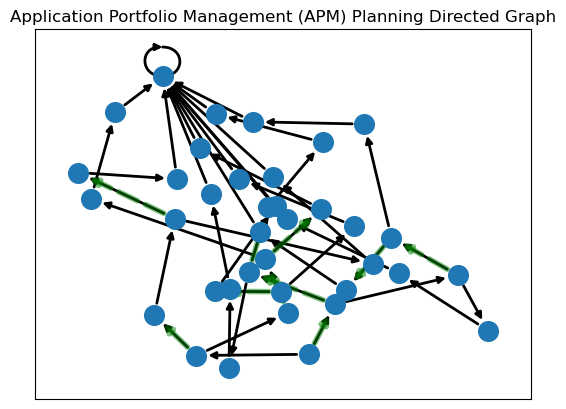

In [70]:

# Get a pointer to the Knowledge Graph.

G = Global._planner_knowledge_graph.get_graph()
pos = nx.spring_layout(G)
fig, ax = plt.subplots()

large_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
small_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 2]

# Define the nodes.

nx.draw_networkx_nodes(G, pos, ax=ax, node_size=200)

# Define the edges.

nx.draw_networkx_edges(G, pos, ax=ax, edgelist=large_edges, width=2)
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=small_edges, width=4, alpha=0.5, edge_color="g", style="dashed")

# Set the title.

plt.title("Application Portfolio Management (APM) Planning Directed Graph")

# Show the graph.

plt.show()


### <font color="Blue">Interactive Application Portfolio Management (APM) Planning Graph</font>

In [72]:
# Get a pointer to the Knowledge Graph.

G = Global._planner_knowledge_graph.get_graph()
pos = nx.spring_layout(G)

# Create the planner graph using Altair Networkx library.

planner_graph = nxa.draw_networkx(
    G, 
    pos=pos,
    node_color='name',
    width='weight',
    node_size=400,
    edge_color='black',
    node_tooltip=['node', 'name:N', 'application_count', 'application'],
).properties(width=600, height=600, title='Application Portfolio Management (APM) Planning Graph')

# Display the planner graph.

planner_graph.interactive()


alt.LayerChart(...)

## <font color="Blue">Design Discussion</font>

### <font color="Blue">Plan Classifications:</font>

The following plan classifications were used in the Planning Agent and can be used as a general guide.  As these definitions can change, the rules can be configured as required to fit the expected result.

<ul>
<li>Rehost: typically a lift-and-shift to another platform without rebuilding the code.</li>
<li>Rebuild: typically starting over from scratch.</li>
<li>Replace: typically eliminating the application entirely and replacing it with something else.</li>
<li>Refactor: typically changing components of the application without an entire rebuild.</li>
<li>Retire: typically eliminating an application completely and not replacing it.</li>
<li>Sustain: typically the best performing applications in the portfolio that will continue to receive investments.</li>
<li>Tolerate: from Gartner's TIME (Tolerate, Invest, Migrate, Eliminate) model that identifies applications that have a high technical condition but a low to medium business value.</li>
    
</ul>


### <font color="Blue">Design Trade-offs:</font>

<ul>
    <li>Data-centric Architecture: The Agent is an example of data-centric architecture where data that can change is configured rather than hard-coded.  Configuring rules / heuristics and data allows for a generic planning agent where other domains outside of APM can be explored.</li>
    <li>A Data-centric Architecture does however download the configuration and maintenance work to Subject Matter Experts such as Enterprise Architects, Tech Leads and Business Owners creating a dependency on their knowledge, skill and the time / resources in maintaining the rule-set.</li>
    <li>Classification Leafs: in the current implementation of the rules, triaging the applications result in only two paths for each performance measurement – high and low.  As the rules are configured, there could be as many nodes created as the knowledge engineer would like.  However, the trade-off is that too many triage paths (e.g., very high, high, medium, low, very low etc.) produces very granular data that could risk over-fitting the data (to borrow a machine learning term).  However, if the triage paths are to general, it runs the risk of under-fitting such that the buckets contain far too many applications.  In the current implementation, opting for a path of two (e.g., high, low) to provide quick triage</li>
<li>Breadth first searches (BFS): BFS searches may not be the most efficient but the entire graph needs to be searched as there could be different states throughout the graph in which the query is interest (e.g., there will be more nodes in the bottom measurement layers.  There are several low modernization nodes for example).</li>
</ul>


### <font color="Blue">Performance:</font>

<ul>
    <li>Performance Assessment Layers: The Agent created six layers to assess an application for different perspectives.  There are many ways to assess an application and the knowledge engineer could add several more layers.  The performance shouldn't be impacted that much as there typically is not that many applications in an application portfolio data set (measured in the hundreds).  Furthermore, the Agent is not relying on real-time assessment.</li>
    <li>Performance Assessment Layers (cont.): more performance assessment layers add more detail and a finer granularity to the assessment but, as noted above, it may become too over-fitted, difficult to classify and therefore harder to quickly triage.</li>
    <li>Graph searches: given the number of nodes created in the graph, neither creating the graph or searching the graph using recursive bread-first searches, depth-first searches, shortest-path and longest-path result in any measurable performance impact.</li>
</ul>


### <font color="Blue">Machine Learning:</font>

This implementation uses an Intelligent Agent, rules / heuristics logic and state-space graph searching to triage applications.  Given that application assessment data could have many fields (e.g., features) with a target output (e.g., target), it is thought that Machine Learning models could be used.  One thing, though, is that an organization's software application inventory may only be measured in the hundreds of applications (at best) and therefore, the data set would be too small for adequate ML training / testing to give accurate predictive analytics results.  Perhaps, though, if there was access to a far larger data set (e.g., a set of organizations), it may be worth exploring.

## <font color="Blue">Summary</font>

In this project, an Intelligent Agent to assist with Application Portfolio Management (APM) has been presented.  The Intelligent Agent uses rules and heuristics to generate a knowledge graph to assess an application's performance from different perspectives.  The Agent is then able to search the graph to identify applications based on certain planning parameters (e.g., rehost, replace, retire etc.).
<br><br>
Given how quickly the portfolio can be assessed once data has been collected, using Intelligent Agents is an effective tool in Application Portfolio Management to quickly assess the portfolio and assist in planning next steps.